In this analysis, I will first look at the data and run an OLS regression.
Next, I will use the K-Nearest-Neighbors regression to analyze the date and look at the differences between the two.

In [36]:
import pandas as pd
import numpy as np
import statsmodels.api as sm
%matplotlib inline
from matplotlib import pyplot as plt
from sklearn import linear_model
pd.options.display.float_format = '{:.3f}'.format
import warnings
warnings.filterwarnings(action="ignore", module="scipy", message="^internal gelsd")

#Statsmodels is a Python package that allows users to explore data, 
#estimate statistical models, and perform statistical tests. ... 
#Statsmodels is built on top of the numerical libraries NumPy and SciPy,
#integrates with Pandas for data handling and uses Patsy for an R-like formula interface.

To start with we load the Longley dataset of US macroeconomic data from the Rdatasets website.

In [27]:
 df = pd.read_csv('http://vincentarelbundock.github.io/Rdatasets/csv/datasets/longley.csv', index_col=0)


In [28]:
print(df.shape)

(16, 7)


In [29]:
df.head()

,GNP.deflator,GNP,Unemployed,Armed.Forces,Population,Year,Employed
1947,83.0,234.289,235.6,159.0,107.608,1947,60.323
1948,88.5,259.426,232.5,145.6,108.632,1948,61.122
1949,88.2,258.054,368.2,161.6,109.773,1949,60.171
1950,89.5,284.599,335.1,165.0,110.929,1950,61.187
1951,96.2,328.975,209.9,309.9,112.075,1951,63.221


In [47]:
#set the values

y = df.Employed

x = df.GNP

x = sm.add_constant(x)

x.head()

,const,GNP
1947,1.000,234.289
1948,1.000,259.426
1949,1.000,258.054
1950,1.000,284.599
1951,1.000,328.975


In [48]:
sm.OLS(y, x)

#look up what this does

In [49]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16 entries, 1947 to 1962
Data columns (total 7 columns):
GNP.deflator    16 non-null float64
GNP             16 non-null float64
Unemployed      16 non-null float64
Armed.Forces    16 non-null float64
Population      16 non-null float64
Year            16 non-null int64
Employed        16 non-null float64
dtypes: float64(6), int64(1)
memory usage: 1.0 KB


In [50]:
x.values

array([[  1.   , 234.289],
       [  1.   , 259.426],
       [  1.   , 258.054],
       [  1.   , 284.599],
       [  1.   , 328.975],
       [  1.   , 346.999],
       [  1.   , 365.385],
       [  1.   , 363.112],
       [  1.   , 397.469],
       [  1.   , 419.18 ],
       [  1.   , 442.769],
       [  1.   , 444.546],
       [  1.   , 482.704],
       [  1.   , 502.601],
       [  1.   , 518.173],
       [  1.   , 554.894]])

In [51]:
y.values

array([60.323, 61.122, 60.171, 61.187, 63.221, 63.639, 64.989, 63.761,
       66.019, 67.857, 68.169, 66.513, 68.655, 69.564, 69.331, 70.551])

In [52]:
len(x)

16

In [53]:
len(y)

16

In [54]:
#find means of the values

mean_x = np.mean(x)
mean_y = np.mean(y)

In [59]:
#instantiate our model

regr = linear_model.LinearRegression()

#fit our model to the data
regr.fit(x, y)

#display the attributes we have calculated
print('Coefficients: \n', regr.coef_)
print('Intercept: \n', regr.intercept_)




Coefficients: 
 [0.         0.03475229]
Intercept: 
 51.84358978188415


ValueError: x and y must be the same size

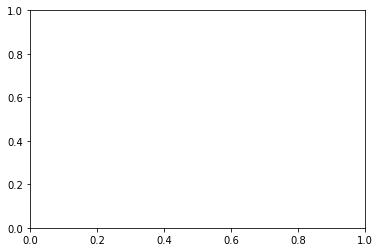

In [60]:
#plot outputs
plt.scatter(x[: 1], y[: 1], color='black')
plt.plot(x, regr.predict(x), color='blue', linewidth = 3)
plt.show()

#how can i fix this error??

So, what information can I gather from this analysis? What else could I do? What have I learned? And how could I proceed if this were a real world problem?